# Configurables

In [46]:
learningRate = 0.01
lossFunctionOptions = [crossEntropyLoss]
lossFunction = lossFunctionOptions[0]

# Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)

In [2]:
import numpy as np
import pandas as pd
import time

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Dataset Importing and Studying

In [4]:
data = pd.read_csv("./wdbc.data")
data.head()

,ID_Number,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.describe()

,ID_Number,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Number           569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   Radius1             569 non-null    float64
 3   Texture1            569 non-null    float64
 4   Perimeter1          569 non-null    float64
 5   Area1               569 non-null    float64
 6   Smoothness1         569 non-null    float64
 7   Compactness1        569 non-null    float64
 8   Concavity1          569 non-null    float64
 9   Concave Points1     569 non-null    float64
 10  Symmetry1           569 non-null    float64
 11  Fractal Dimension1  569 non-null    float64
 12  Radius2             569 non-null    float64
 13  Texture2            569 non-null    float64
 14  Perimeter2          569 non-null    float64
 15  Area2               569 non-null    float64
 16  Smoothne

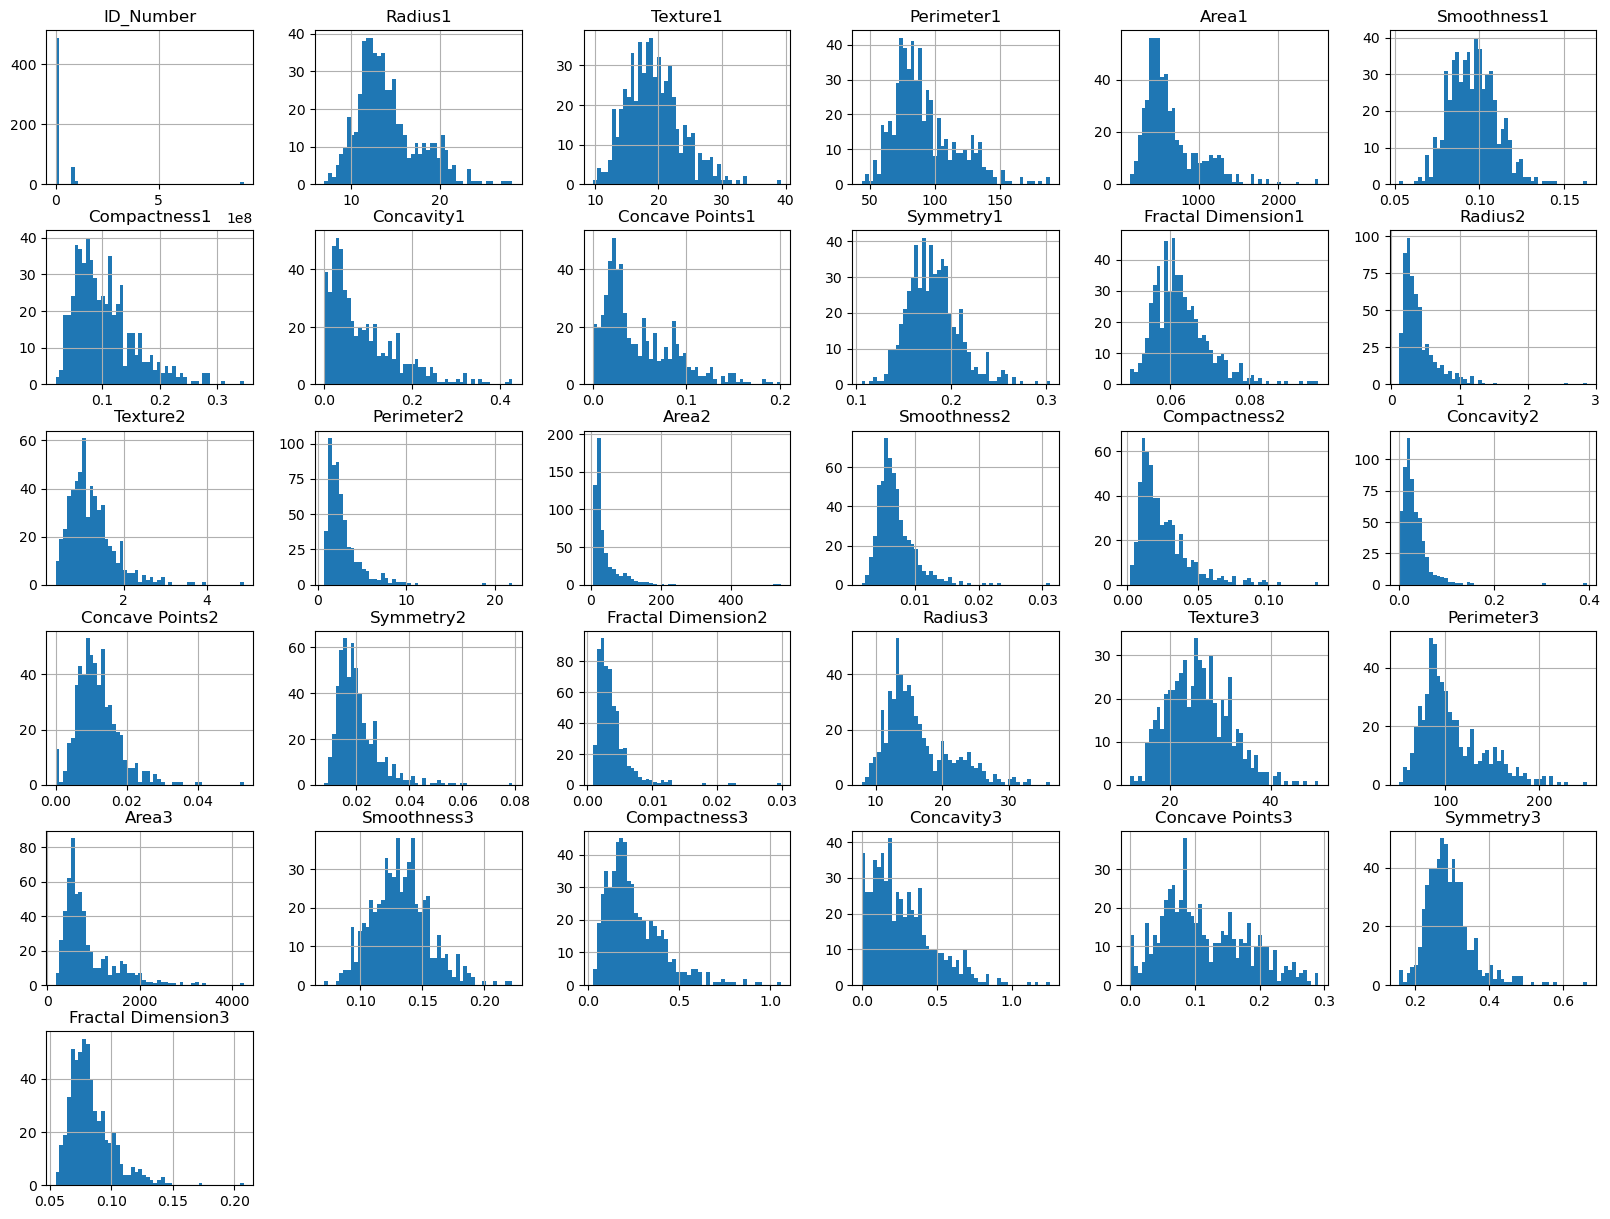

In [7]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
data.drop('ID_Number', axis=1)

,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Gradient Descent

# Functions

### Activation functions

In [23]:
def logistic(X, W, b):
    z = np.dot(X, W)
    return 1 / (1 + np.exp(-z))

def relu(X, W, b):
    Z = np.multiply(X, W)
    print(Z)
    r = []
    for z in Z:
        if z < 0:
            r.append(0)
        else:
            r.append(z)
    return r

def tanh(X, W, b):
    z = np.dot(X, W) + b
    return np.tanh(z)

### Cost and Loss Functions

In [37]:
def cost(y, yh):
    r = []
    for i in range(0, len(y)):
        r.append(lossFunction(y[i], yh[i]))
    return np.mean(r)

def crossEntropyLoss(y, yh):
    return -(y * np.log(yh) + (1 - y) * np.log(1 - yh))